## Importación de librería

Se importan las librerías

In [237]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Lectura de los datos

Se cargan y se leen los datos

In [238]:
df_data = pd.read_csv("dataset/titanic.csv", index_col=None)
df_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [239]:
"""df_data['Age'].fillna(-1, inplace=True)
df_data['Age'] = df_data['Age'].astype(int)

df_data.dtypes
df_data"""

"df_data['Age'].fillna(-1, inplace=True)\ndf_data['Age'] = df_data['Age'].astype(int)\n\ndf_data.dtypes\ndf_data"

## Limpieza de los datos

Se elimina la columna "PassengerId"

In [240]:
df_data = df_data.drop(columns=["PassengerId"])
df_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Revisión de datos nulos

<Axes: >

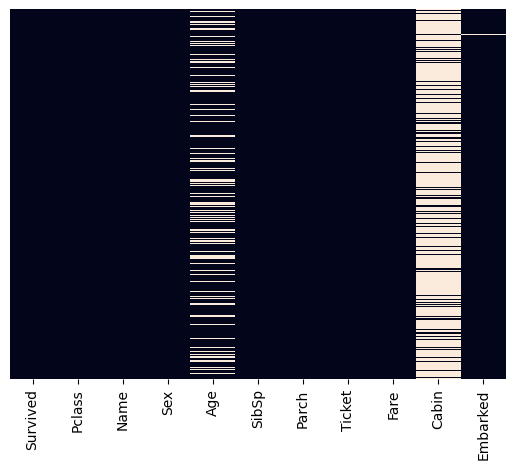

In [241]:
sns.heatmap(df_data.isnull(), yticklabels=False, cbar=False)

Cada linea blanca representa un dato faltante, entonces se puede observar lo siguiente:
- En la columna "Age" faltan datos, pero no tantos como para no tomar en cuenta la tabla
- En la columna "Cabin" faltan demasiados datos, tanto como para eliminar la tabla.

Se decidió completar los nulos de la columna "Age" con tendencias

In [242]:
df_data = df_data.drop(columns=["Cabin"])

## Categorización

Creamos una nueva categoría llamada "Survived_cat" donde se divide con valores 0 y 1 (Sobrevivió o no respectivamente)

In [243]:
df_data["Survived_cat"] = (df_data["Survived"] != 1).astype(int)
df_data["Survived_cat"].value_counts()

Survived_cat
1    549
0    342
Name: count, dtype: int64

In [244]:
df_data.to_csv("results/titanic_cat.csv", index=False)

df_nulls = df_data.isna()
df_nulls.value_counts()

Survived  Pclass  Name   Sex    Age    SibSp  Parch  Ticket  Fare   Embarked  Survived_cat
False     False   False  False  False  False  False  False   False  False     False           712
                                True   False  False  False   False  False     False           177
                                False  False  False  False   False  True      False             2
Name: count, dtype: int64

In [245]:
def RellenoNulls(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        elif Pclass == 3:
            return 24
    
    else:
        return Age

/tmp/ipykernel_88076/3408878272.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/tmp/ipykernel_88076/3408878272.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

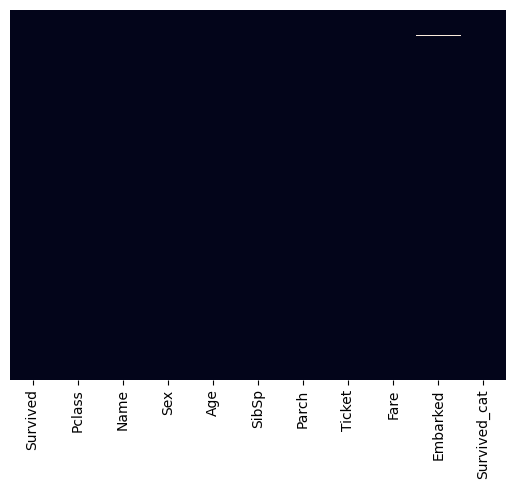

In [246]:
df_data["Age"] = df_data[['Age', 'Pclass']].apply(RellenoNulls, axis=1)
sns.heatmap(df_data.isnull(), yticklabels=False, cbar=False)

In [247]:
import numpy as np

q1 = np.quantile(df_data["Age"], .25)
q3 = np.quantile(df_data["Age"], .75)

iqr = q3-q1

min_range = q1 - 1.5*iqr
max_range = q3 + 1.5*iqr

[min_range, max_range]

[-0.5, 59.5]

In [248]:
df_data["Age_outlier"] = df_data["Age"].between(min_range, max_range)
df_data["Age_outlier"].value_counts()

Age_outlier
True     865
False     26
Name: count, dtype: int64

In [249]:
def detecting_outlier(df_data, name_column):
    q1 = np.quantile(df_data[name_column], .25)
    q3 = np.quantile(df_data[name_column], .75)

    iqr = q3-q1

    min_range = q1 - 1.5*iqr
    max_range = q3 + 1.5*iqr

    return df_data[name_column].between(min_range, max_range)

In [250]:
df_data_outlier = pd.DataFrame() # Creamos un df vacio

for column in df_data.columns:
    if column != "Survived_cat" and column != "Age_outlier" and df_data[column].dtype != pd.StringDtype:
        print("Processing column: ", column)
        df_data_outlier[column] = detecting_outlier(df_data, column)

Processing column:  Survived
Processing column:  Pclass
Processing column:  Age
Processing column:  SibSp
Processing column:  Parch
Processing column:  Fare


In [251]:
matrix_summary = []

for column in df_data_outlier.columns:
    value_counts = df_data_outlier[column].value_counts()

    if False in value_counts.index:
        false_values = value_counts[False]
    else:
        false_values = 0

    if True in value_counts.index:
        true_values = value_counts[True]
    else:
        true_values = 0


    row = [
        column,
        false_values,
        true_values
    ]

    matrix_summary.append(row)

summary_outliers = pd.DataFrame(data=matrix_summary, columns=["column", "False", "True"])

In [252]:
summary_outliers

,column,False,True
0,Survived,0,891
1,Pclass,0,891
2,Age,26,865
3,SibSp,46,845
4,Parch,213,678
5,Fare,116,775


In [253]:
from sklearn.ensemble import IsolationForest

X = df_data.drop(columns=["Survived_cat", "Name", "Sex", "SibSp", "Ticket", "Embarked"])
clf = IsolationForest(random_state=0).fit(X)
X["is_outlier"] = clf.predict(X)
X["is_outlier"].value_counts()

is_outlier
 1    668
-1    223
Name: count, dtype: int64

In [254]:
a = (X["is_outlier"] == 1).sum()
b = (X["is_outlier"] == -1).sum()

total = a + b

porcentaje_a = a / total * 100
porcentaje_b = b / total * 100

print("El porcentaje de outlier (IQR) es de ", porcentaje_b)

El porcentaje de outlier (IQR) es de  25.028058361391697


<Axes: ylabel='Age'>

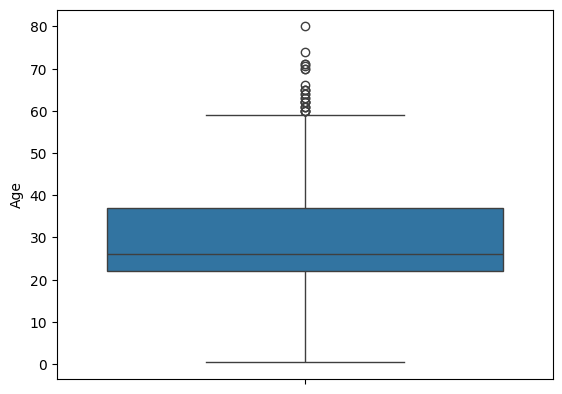

In [255]:
sns.boxplot(df_data["Age"])

In [256]:
from scipy.stats import zscore

Y = df_data.drop(columns=["Survived_cat", "Name", "Sex", "SibSp", "Ticket", "Embarked", "Age_outlier"])

z_scores = Y.apply(zscore)

umbral = 3
outliers_count = (z_scores.abs() > umbral).sum()

total_outliers = outliers_count.sum()
print("Cantidad total de outliers en el dataset:", total_outliers)

Cantidad total de outliers en el dataset: 42


## Visualización de la muestra

Se representan mediante gráficos algunos ejemplos a analizar de la muestra

<Axes: xlabel='Survived_cat', ylabel='count'>

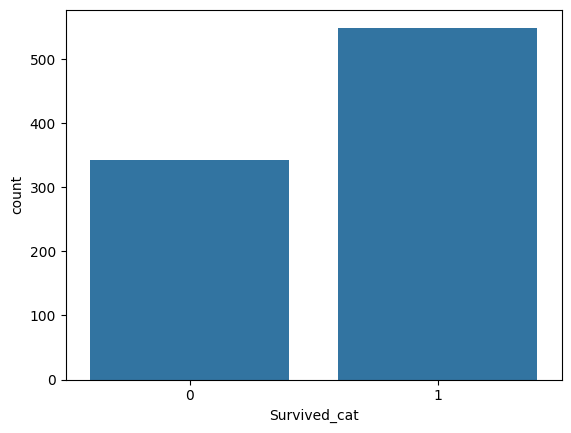

In [257]:
sns.countplot(x='Survived_cat', data=df_data)

<Axes: xlabel='Survived_cat', ylabel='count'>

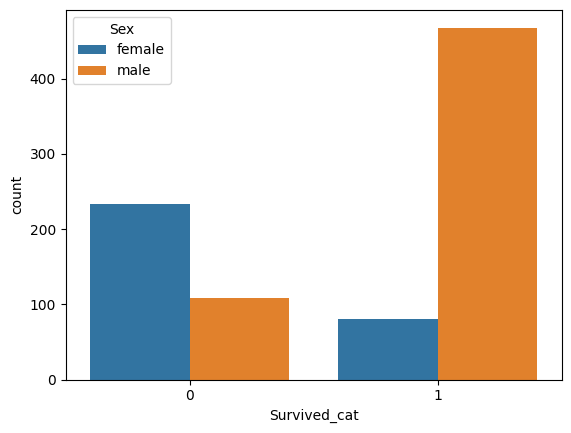

In [258]:
sns.countplot(x='Survived_cat', hue='Sex', data=df_data)


<Axes: xlabel='Survived_cat', ylabel='count'>

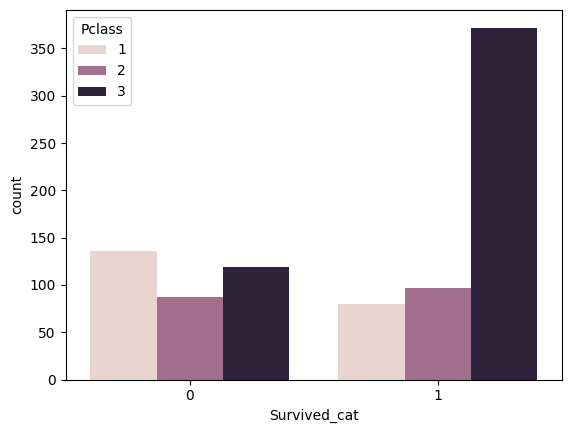

In [259]:
sns.countplot(x='Survived_cat', hue='Pclass', data=df_data)


/tmp/ipykernel_88076/2299091490.py:6: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(ax=axes[1], x=df_data["Age"], y=df_data["Pclass"], kind='hex')


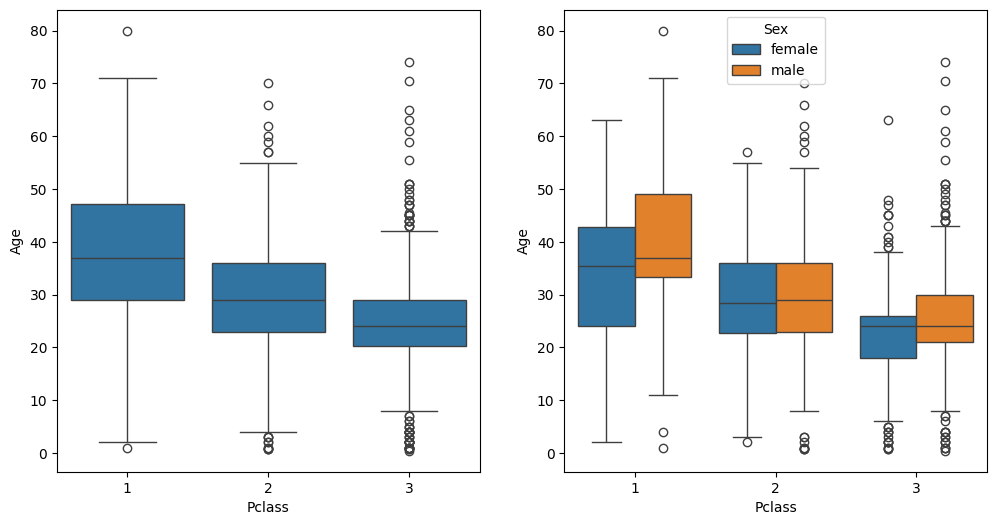

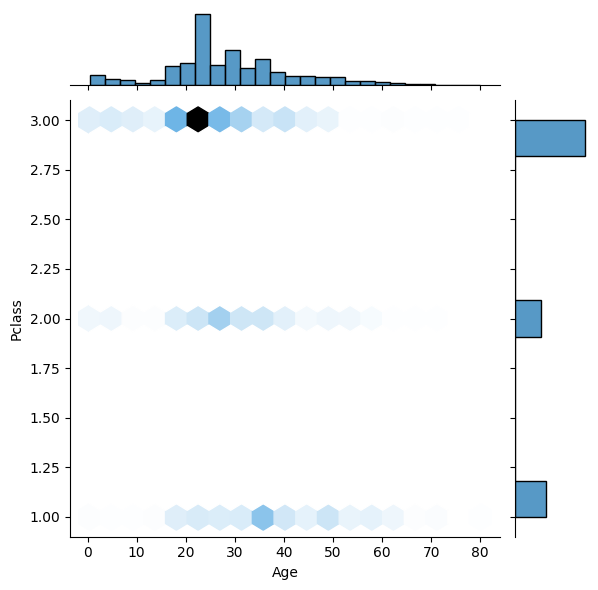

In [264]:
fig, axes = plt.subplots(1,2, figsize=(12,6))

sns.boxplot(ax=axes[0], data=df_data, x="Pclass", y="Age")
sns.boxplot(ax=axes[1], data=df_data, x="Pclass", y="Age", hue="Sex")

sns.jointplot(ax=axes[1], x=df_data["Age"], y=df_data["Pclass"], kind='hex')